In [1]:
import pandas as pd
import requests
import json
import config
from matplotlib import style
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
import time
from sklearn import linear_model
from sklearn import metrics

In [2]:
class core_stock():
    def daily(symbol, function = 'TIME_SERIES_DAILY', outputsize='full', api_key = config.free_api_key):
        url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize={outputsize}&apikey={config.free_api_key}'
        r = requests.get(url)
        data = r.json()
        return data

In [3]:
df = []

Variables = ['CRBG','AIG','MET','BRK.A','BA']

for x in Variables:
        try:
                y = core_stock.daily(x)
                y = pd.DataFrame.from_dict(y['Time Series (Daily)'], orient='index')
                y[f'{x}_close'] = y['4. close'].astype('float')
                y = y.drop(['1. open', '2. high', '3. low', '4. close', '5. volume'], axis=1)
                #time.sleep(12) # Free Tier only has 5 API calls per minute.  Once every 12 seconds.
                df.append(y)
        except:
                print("Error.  You might have reached a limimt on API requests per minute.  Wait a minute and try again later.")
df  = pd.concat(df, join='inner', axis=1)
df.reset_index(inplace=True)
df['Date'] = pd.DatetimeIndex(df['index'])
df.drop(columns=['index'], inplace=True)
df.head()

,CRBG_close,AIG_close,MET_close,BRK.A_close,BA_close,Date
0,21.64,53.25,68.06,427169.99,141.32,2022-10-21
1,20.59,51.85,66.02,413950.10,139.13,2022-10-20
2,20.90,52.75,67.34,421610.00,138.39,2022-10-19
3,21.28,52.60,67.38,428465.00,137.34,2022-10-18
4,20.69,51.73,66.27,419100.80,136.09,2022-10-17


C:\Users\Greg\AppData\Local\Temp\ipykernel_18044\3197575793.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True )


<AxesSubplot: >

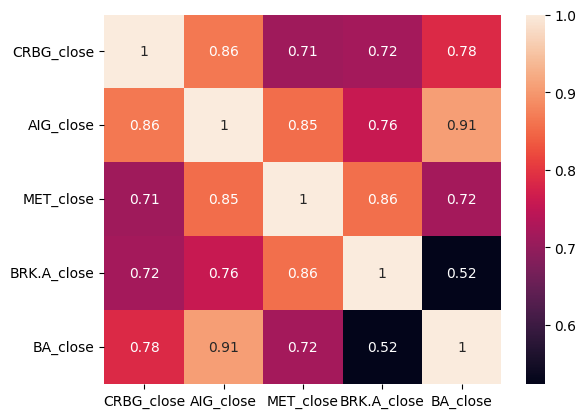

In [4]:
#  Getting ready to make some cool shit

sns.heatmap(df.corr(),annot=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = df['CRBG_close']
X = df[['AIG_close','MET_close','BRK.A_close','BA_close']]

lm = LinearRegression()

lm.fit(X,y)

LinearRegression()

In [16]:
print("R squared = ",lm.score(X,y))
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

# if we hold all other features fixed, a one unit increase in CoreBridge is associated with a 0.17 increase of AIG and a 0.11 decrease of MET etc.

R squared =  0.7847844900605422


,Coeff
AIG_close,0.173476
MET_close,-0.109779
BRK.A_close,0.000033
BA_close,0.026477
